In [93]:
import pyautogui
import numpy as np
from PIL import Image
from skimage.measure import compare_ssim
import imutils
import time

In [74]:
time.sleep(3)
old = pyautogui.screenshot()
old = np.array(old)
#Image.fromarray(old)

In [75]:
time.sleep(3)
new = pyautogui.screenshot()
new = np.array(new)
#Image.fromarray(new)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


SSIM: 0.9996448139011761


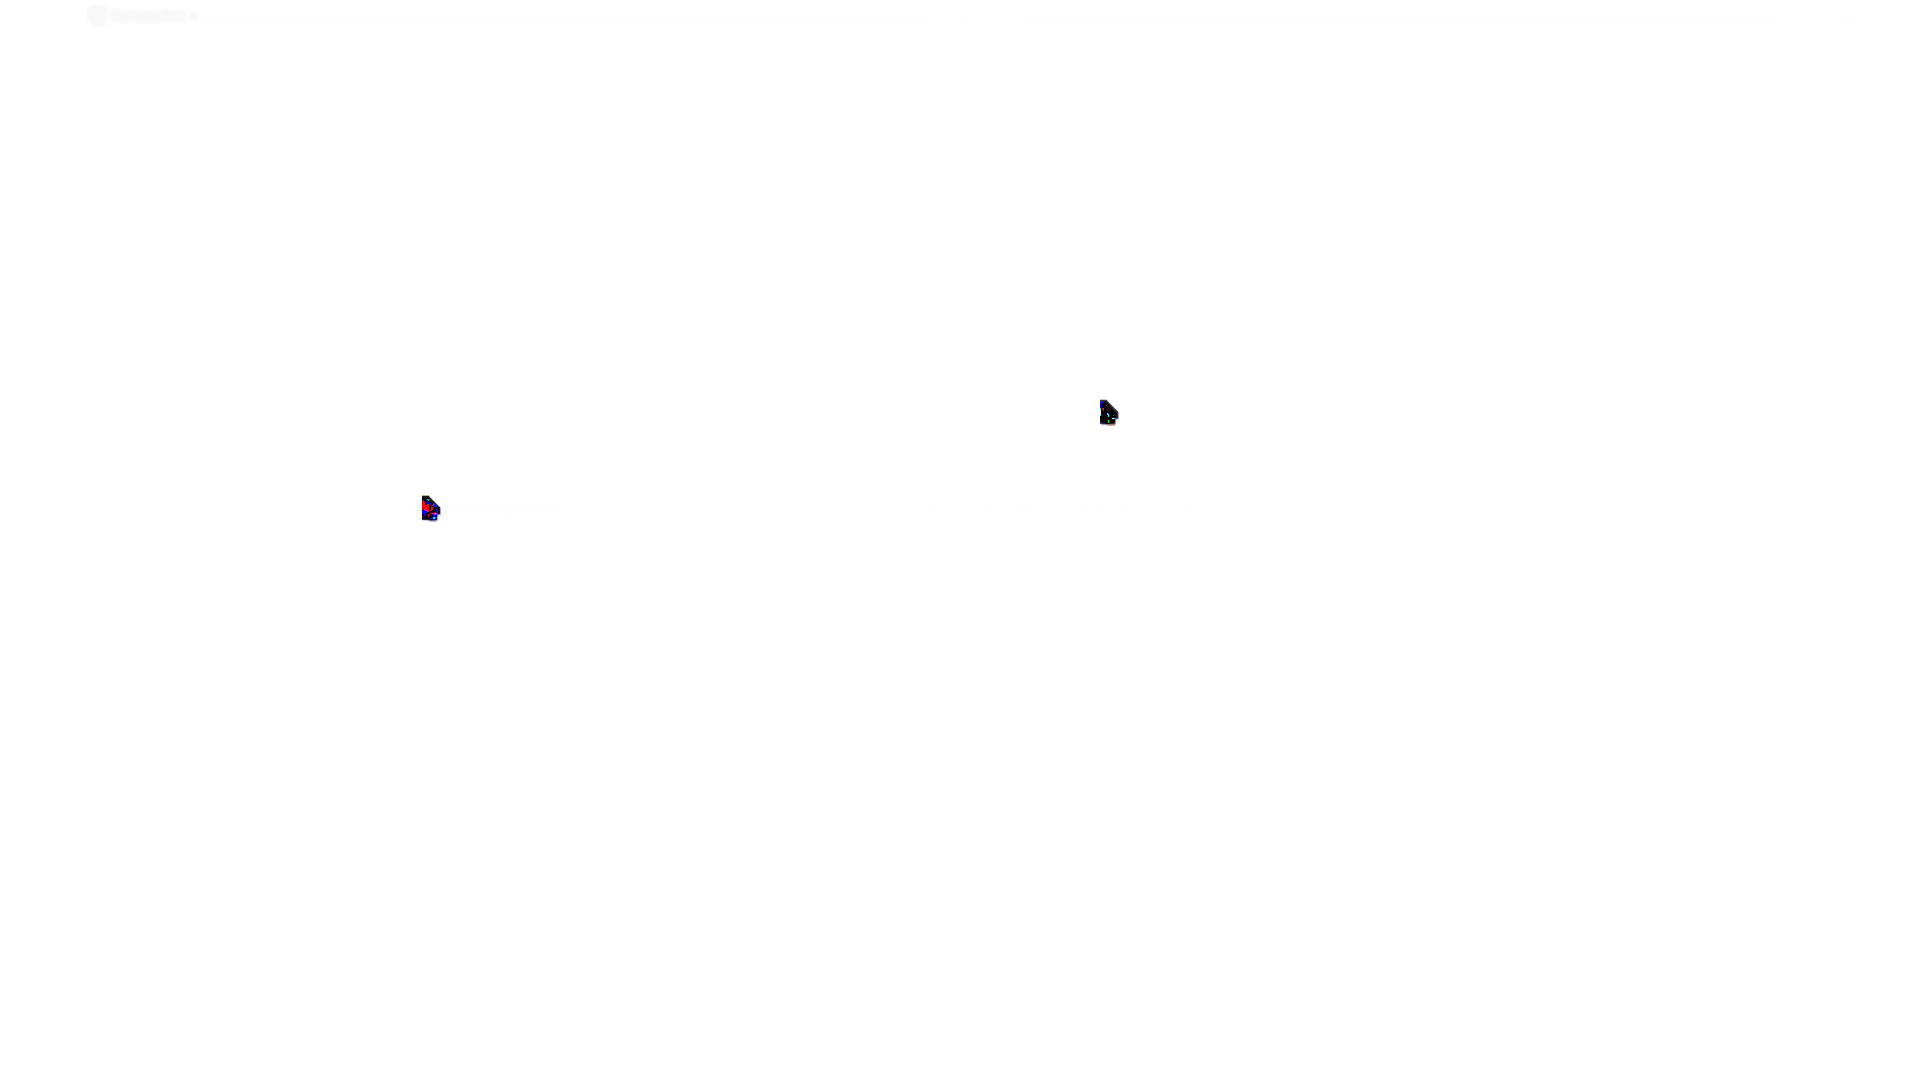

In [83]:
(score, diff) = compare_ssim(old, new, full=True, multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
Image.fromarray(diff)

In [84]:
old = cv2.imread("images/1.png")
new = cv2.imread("images/2.png")

In [86]:
(score, diff) = compare_ssim(old, new, full=True, multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


SSIM: 0.9996448139011761


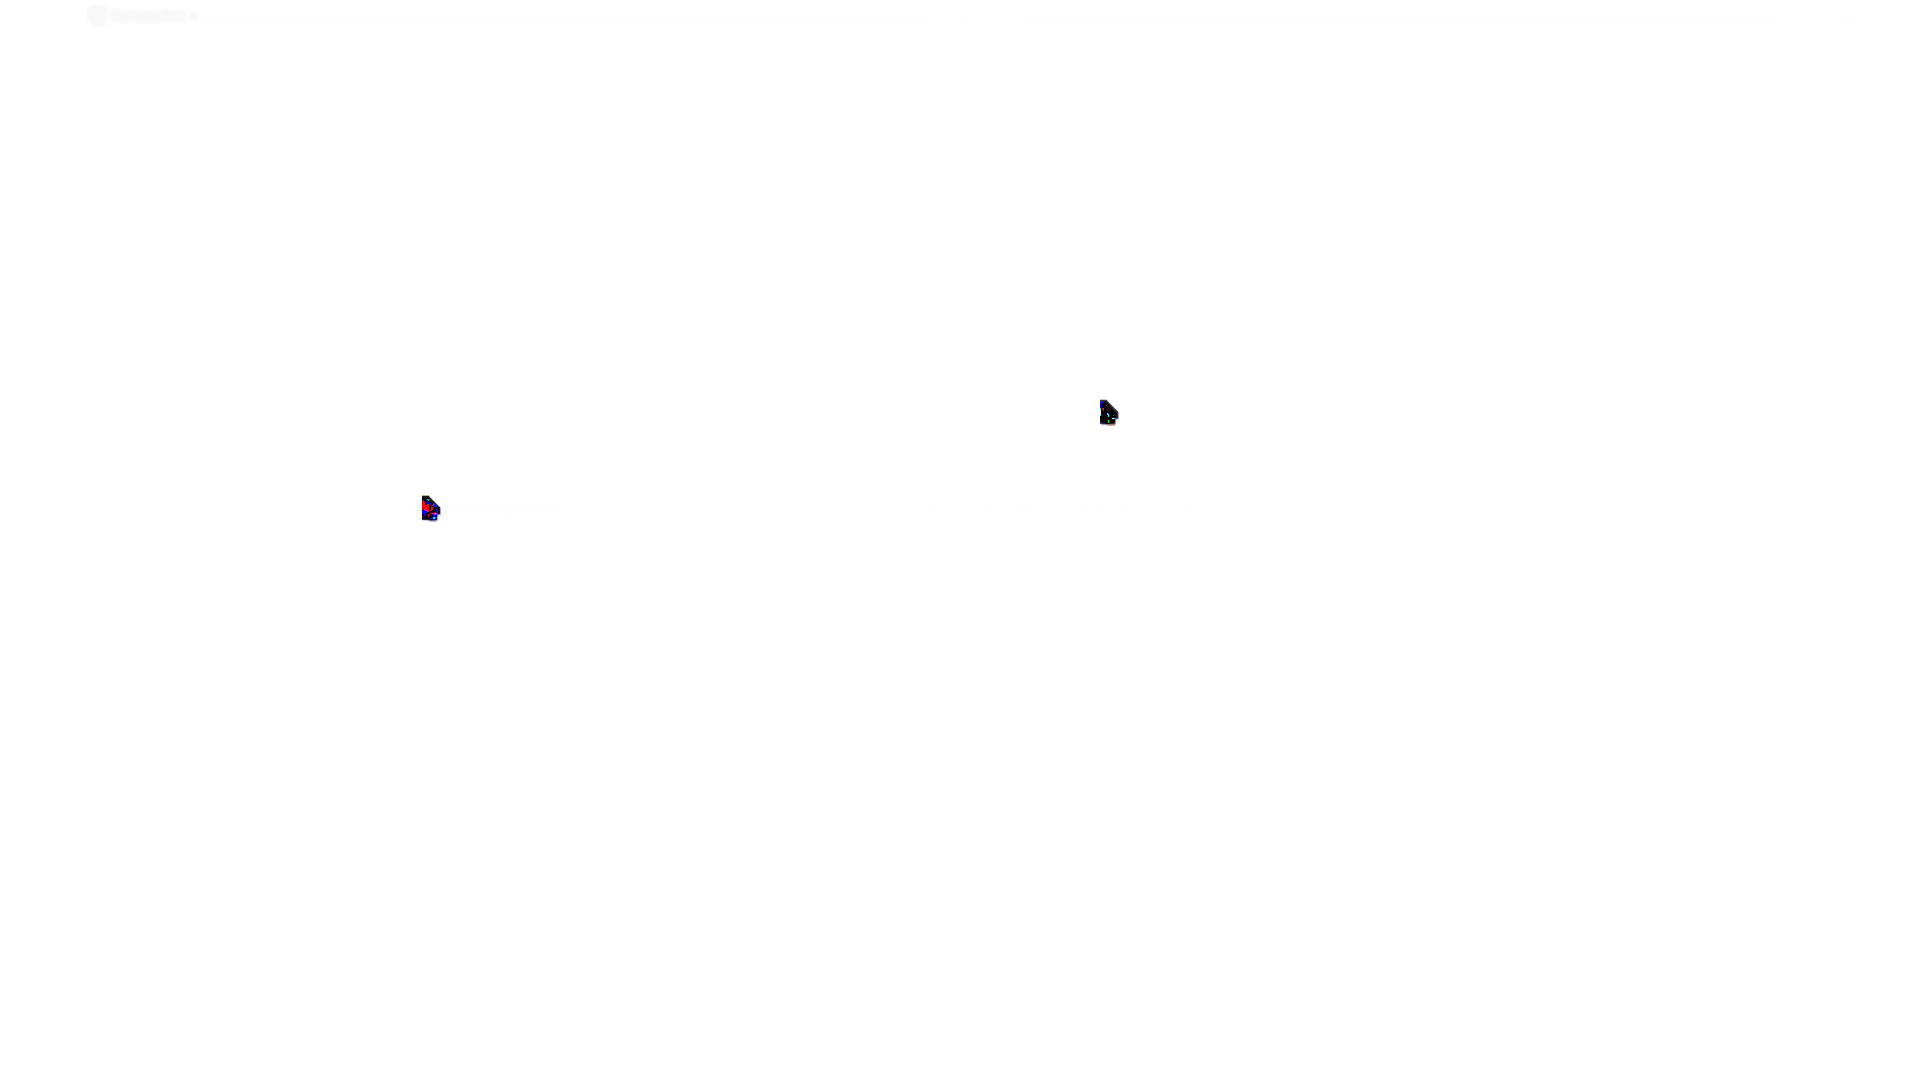

In [87]:
Image.fromarray(diff)

In [94]:
diff_in_gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(diff_in_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(old, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(new, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images
cv2.imshow("Original", old)
cv2.imshow("Modified", new)
#cv2.imshow("Diff", diff)
#cv2.imshow("Thresh", thresh)
#cv2.waitKey(0)